<a href="https://colab.research.google.com/github/Pakopac/Monkey_Species_CNN/blob/master/MonkeySpeciesProd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monkey Species Recognition CNN - PRODUCTION



Import libraries and directory

In [28]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab_Notebooks/monkey/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load model

In [30]:
model = keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/monkey/model_mobileNet.h5")

Add button to upload image to test

In [31]:
from ipywidgets import FileUpload

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        with open(filename, 'wb') as f:
            # add file content to data['content']
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

# Define button
upload_btn = FileUpload()
# Check when add file after clicking button and call function
upload_btn.observe(on_upload_change, names='_counter')
upload_btn

FileUpload(value={}, description='Upload')

Adapt image for our model

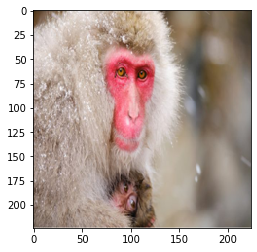

In [32]:
import io
from PIL import Image

# Get image data
upload_btn.data[0]

for name, file_info in upload_btn.value.items():
    # Convert into image
    img = Image.open(io.BytesIO(file_info['content']))

# Convert into array (60,60)
image = tf.keras.utils.img_to_array(img.resize((224, 224)))

# Visualisation image with pyplot
plt.imshow(image/255, interpolation='nearest')
plt.show()

# Reshape image for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Get prediction

In [33]:
predictions = model.predict(image)
predictions

array([[0.02941237, 0.10044662, 0.36530975, 0.03616732, 0.13149004,
        0.03881342, 0.08747869, 0.04214794, 0.13693054, 0.03180338]],
      dtype=float32)

In [34]:
# Get result of prediction
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
df = pd.read_csv(data_dir + "monkey_labels.txt", names=cols, skiprows=1)
df["Common Name"][np.argmax(predictions, axis = 1)]

2     bald_uakari                   
Name: Common Name, dtype: object